# Prohledávání do šířky (BFS)

In [1]:
%matplotlib inline
from search import parse_state, is_goal, actions, move
from search import show_plan, visualize_search, log_search_step
import solutions

Variantou stromového prohledávní, které najde nejkraší cestu,
je *prohledávání do šířky* (*Breadth-first search*, BFS).
Při BFS využíváme jako okraj frontu, tedy kolekci typu *First-In First-Out* (FIFO), což je prostě seznam, v němž odebíráme z opačné strany, než na kterou přidáváme. Jako u běžné fronty v obchodě.

## Fronta v Pythonu

In [2]:
from collections import deque
queue = deque(['a', 'b', 'c'])  # 'a' na zacatku fronty, 'c' na konci
queue.append('d')  # 'd' prisel na konec fronty
print(queue)  # deque(['a', 'b', 'c', 'd'])
queue.popleft()  # odchazi 'a'
print(queue)  # deque(['b', 'c', 'd'])
queue.popleft()  # odchazi 'b'
print(queue)  # deque(['c', 'd'])

deque(['a', 'b', 'c', 'd'])
deque(['b', 'c', 'd'])
deque(['c', 'd'])


## BFS krok za krokem

Při použití fronty jako okraje dojde k průzkumu prvků v pořadí po vrstvách podle jejich vzdálenosti od počátečního stavu:

Explored: Fringe:              Plans:                 
0: -      [c1]                 c1:''                  
1: c1     [b2, d2]             + b2:l, d2:r           
2: b2     [d2, a3, b3]         + a3:ll, b3:lf         
3: d2     [a3, b3, d3, e3]     + d3:rf, e3:rr         
4: a3     [b3, d3, e3, a4, b4] + a4:llf, b4:llr       
5: b3     [d3, e3, a4, b4]                            
6: d3     [e3, a4, b4, d4, e4] + d4:rff, e4:rfr       
7: e3     [a4, b4, d4, e4]                            
8: a4     [b4, d4, e4]                                


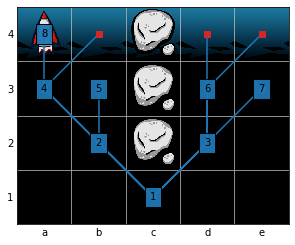

In [6]:
state = parse_state(
'| | |A| | |'
'| | |A| | |'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, text=True, interactive=False):
    solutions.bfs(state)

## Implementace

<div class="alert alert-block alert-success">
<b>Úkol 6.1: Prohledávání do šířky</b><br/>
Implementujte funkci <i>bfs(initial_state)</i>,
která vrací nejkratší plán pro cestu z <i>initial_state</i> do cílového stavu
nalezený pomocí prohledávání do šířky.

<p>
Tipy:
<ul>
<li>Použijte frontu pro ukládání stavů na okraji.</li>
<li>
Pro každý objevený stav si uložte jeho plán do slovníku (jako u DFS).
</li>
<li>
Abyste zabránily opakovanému prozkoumávání stejných stavů,
do kterých se lze dostat více cestami,
přidávejte do fronty pouze ještě neobjevené stavy.
Pro všechny objevené stavy máme nějaký plán,
takže kontrola může vypadat takto:
`if next_state not in plans: ...`.
</li>
</ul>
</p>
</div>

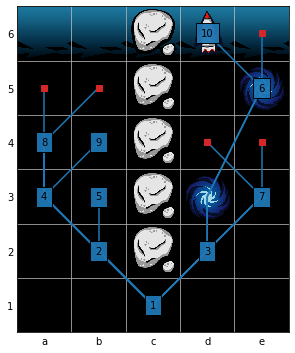

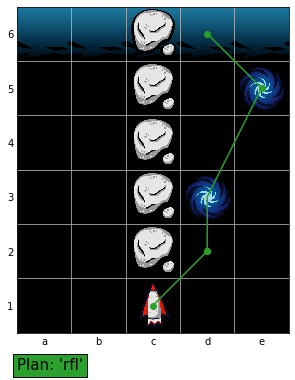

In [7]:
def bfs(initial_state):
    queue = deque([initial_state])
    plans = {initial_state: ''}
    log_search_step(None, queue, plans)
    while queue:
        state = queue.popleft()
        # TODO: Implementujte BFS.
        log_search_step(state, queue, plans)

state = parse_state(
'| | |A| | |'
'| | |A| |W|'
'| | |A| | |'
'| | |A|W| |'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, interactive=False):
    plan = solutions.bfs(state)  # Vzorove reseni.
    #plan = bfs(state)  # Vase reseni:
show_plan(state, plan)

## Shrnutí

<div class="alert alert-block alert-info">
<ul>
<li>
BFS je varianta stromového prohledávání, při kterém stavy z okraje
vybíráme v pořadí FIFO (First In - First Out), tj.
jako okraj používáme frontu.
</li>
<li>
BFS prochází stavy v pořadí podle jejich vzdálenosti od počátečního stavu. Díky tomu najde zaručeně nejkratší řešení.
</li>
<li>
BFS má typicky větší paměťové nároky než DFS.
(Pokud je cíl v hloubce h, bude fronta obsahovat
všechny stavy, do kterých se dá dostat h akcemi.)
</li>
</ul>
</div>

Co ale s tím, když mají akce různou cenu? [07 - Prohledávání s cenou](./07-uniform-cost-search.ipynb)